In [1]:
from dataset import COCOSegmentation
import utils
from torchvision.transforms.functional import to_tensor, to_pil_image
import matplotlib.pyplot as plt
import torch
from visualize import visualize_prediction

/opt/anaconda3/envs/licenta/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_test = COCOSegmentation(split='val', my_transforms=True)
classes = ['dent', 'scratch', 'crack', 'glass_shatter', 'lamp_broken', 'tire_flat']
sample = dataset_test[1]
print(len(dataset_test))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
810


In [5]:
from ultralytics import YOLO
model_path = '/Users/dragos/Licenta/Results/YOLO/best.pt'
image_path = '/Users/dragos/Licenta/CarDD_release/CarDD_COCO/test2017/000088.jpg'
model = YOLO(model_path)
device = torch.device('mps')
model.to(device)
results = model(image_path)



image 1/1 /Users/dragos/Licenta/CarDD_release/CarDD_COCO/test2017/000088.jpg: 480x640 2 cracks, 385.5ms
Speed: 4.9ms preprocess, 385.5ms inference, 339.5ms postprocess per image at shape (1, 3, 480, 640)


tensor([2., 2.], device='mps:0')
torch.Size([3, 480, 640])
torch.Size([2, 480, 640])


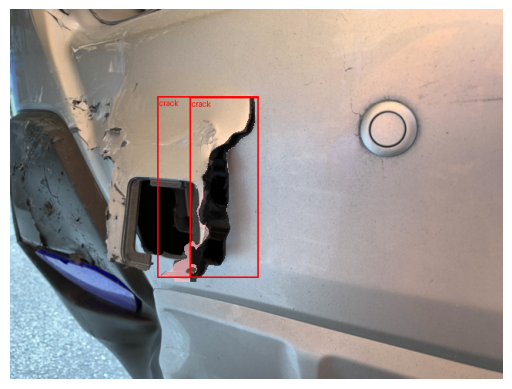

In [6]:
for result in results:
    print(result.boxes.cls)
    image = visualize_prediction(result)
    plt.imshow(to_pil_image(image))
    plt.axis('off')
    plt.show()

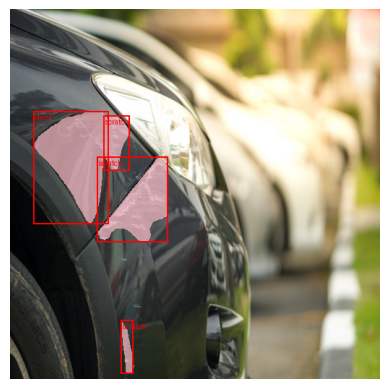

In [5]:
prediction = utils.plot_prediction([sample[0]], [sample[1]])
plt.imshow(to_pil_image(prediction))
plt.axis('off')
plt.show()
